In [8]:
from keras.applications import VGG16
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as k

In [4]:
model = VGG16(weights='imagenet', include_top=False)

In [15]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x=np.clip(x,0,1)
    x*=255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [9]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = k.mean(layer_output[:, :, :, filter_index])

    grads = k.gradients(loss, model.input)[0]
    grads /= (k.sqrt(k.mean(k.square(grads))) + 1e-5)
    iterate = k.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

In [17]:
# plt.imshow(generate_pattern('block3_conv1', 0))

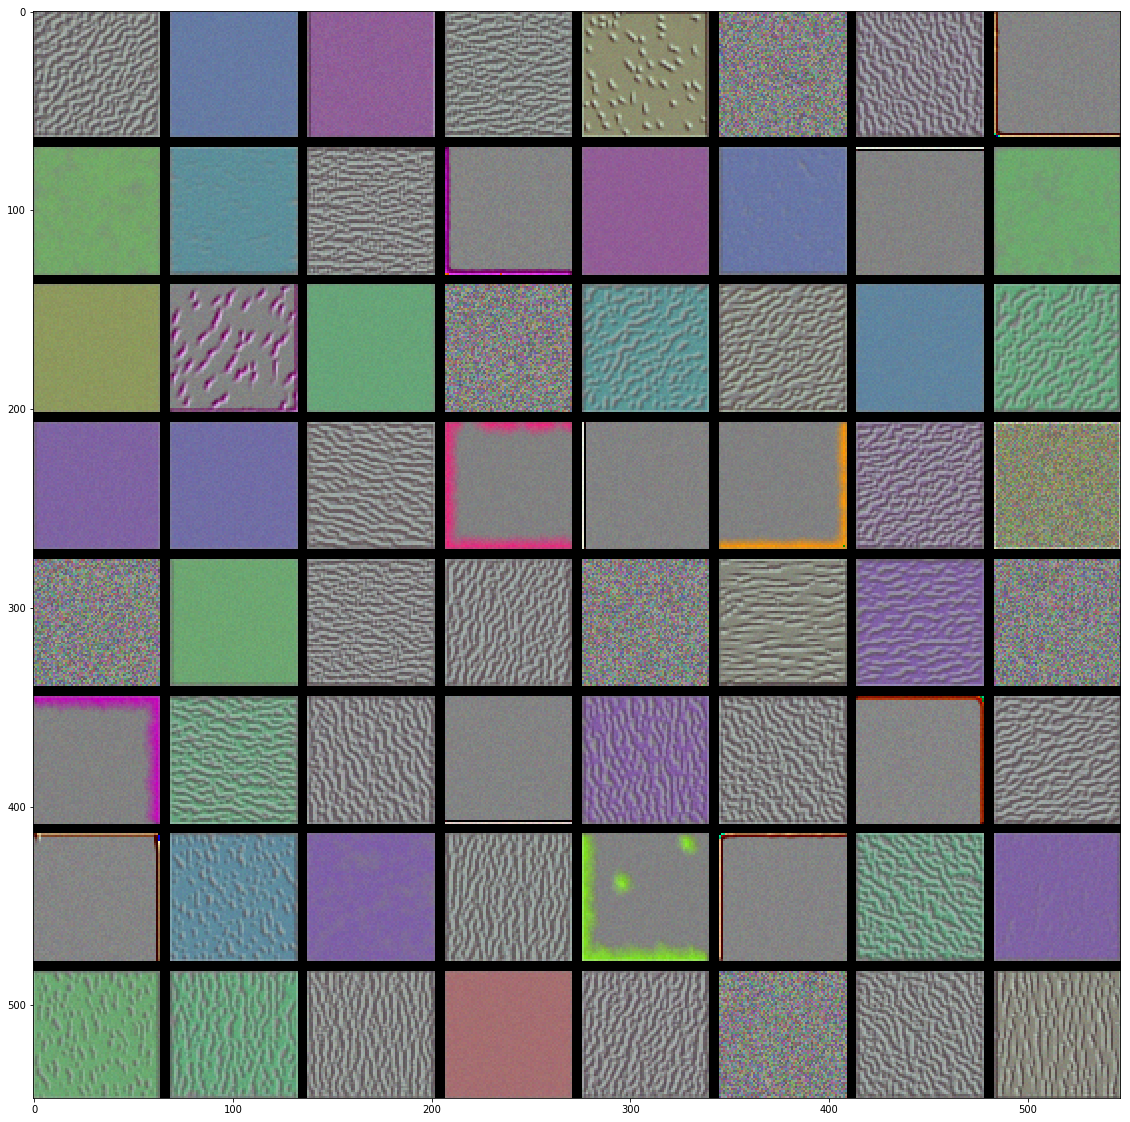

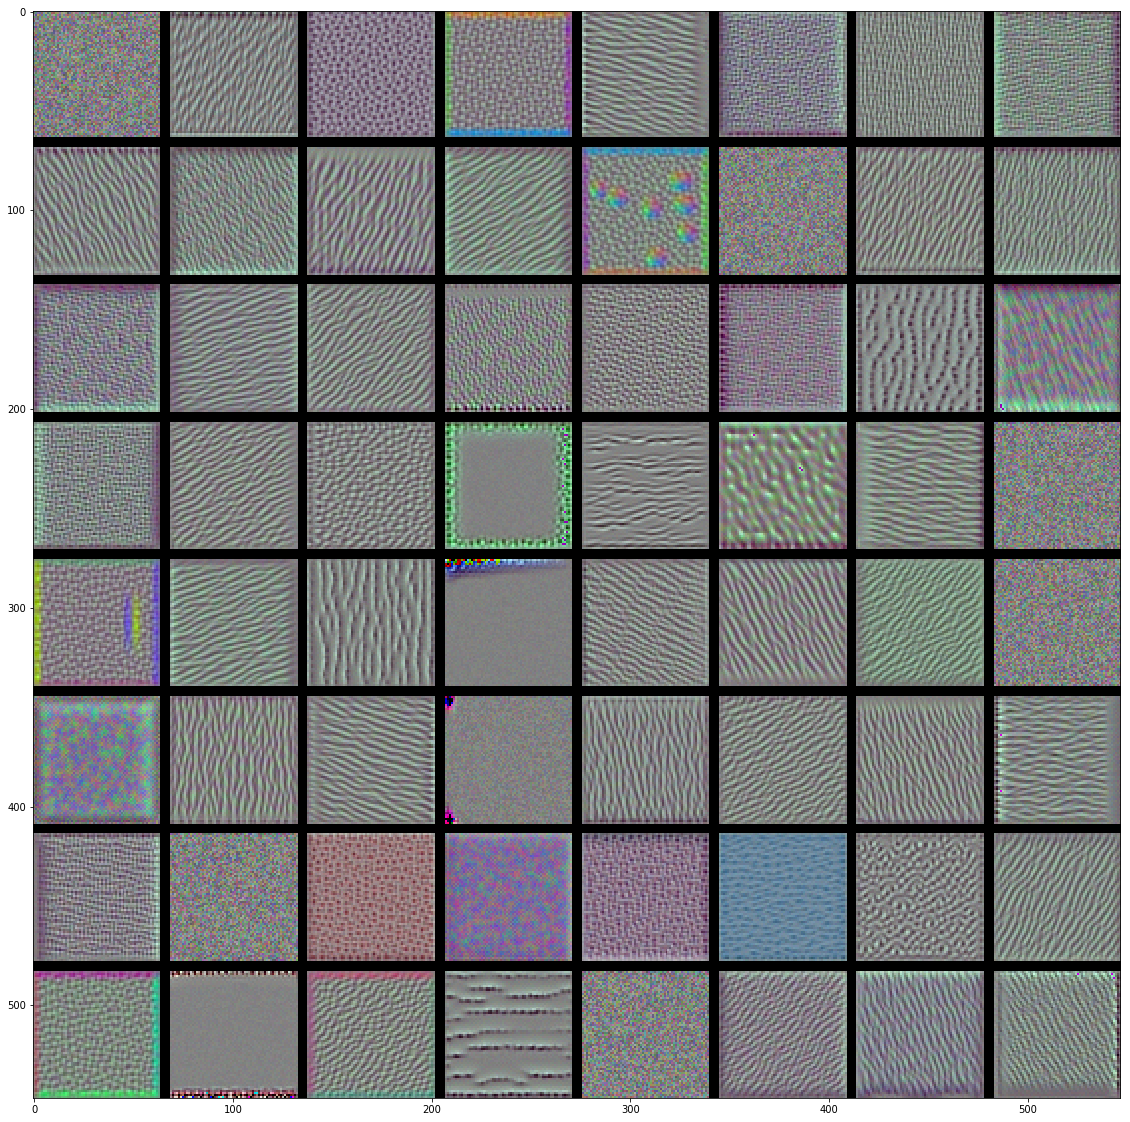

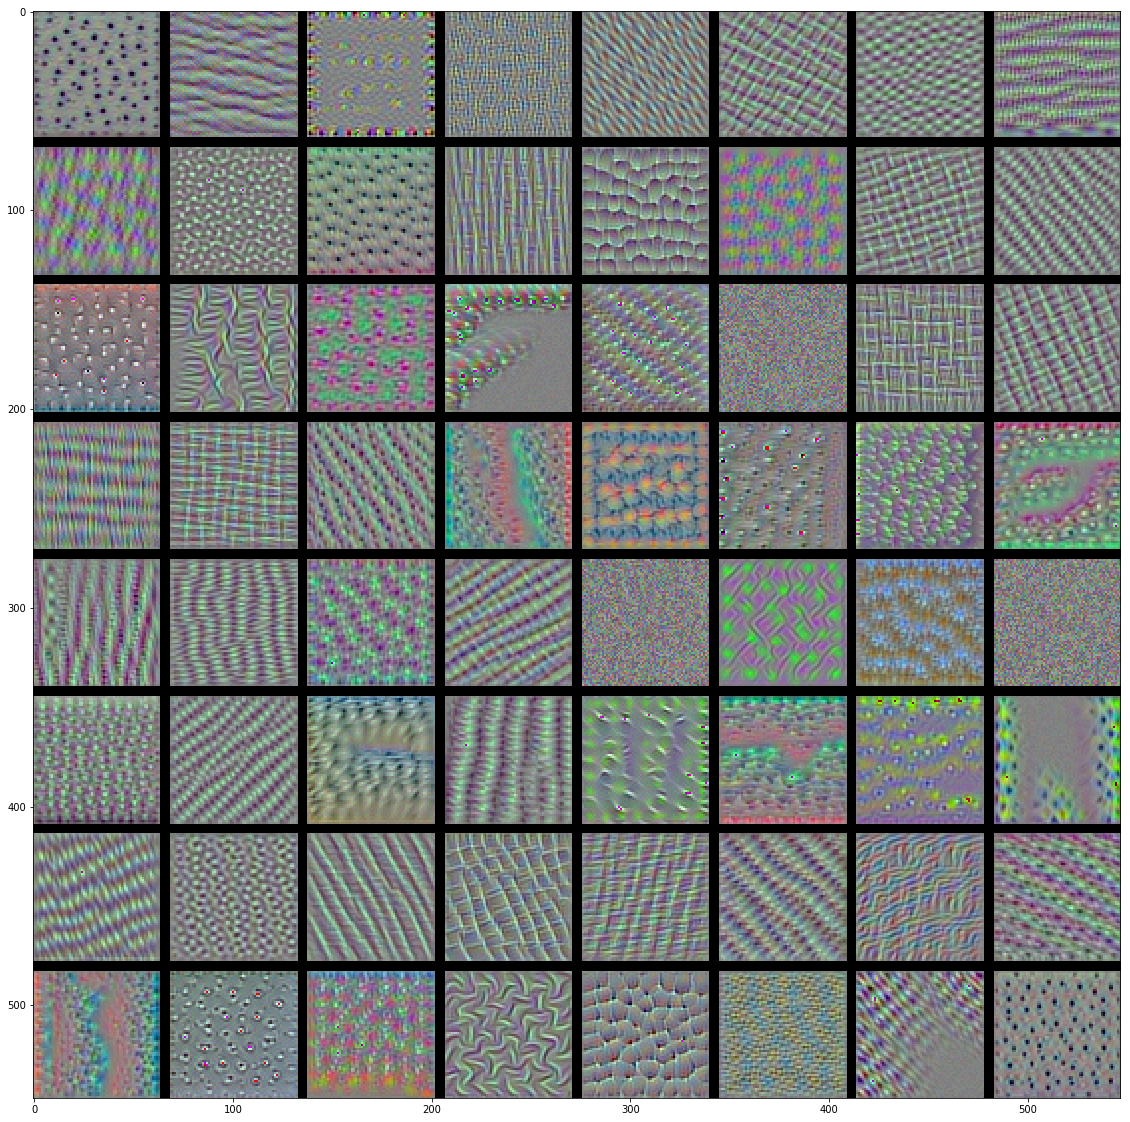

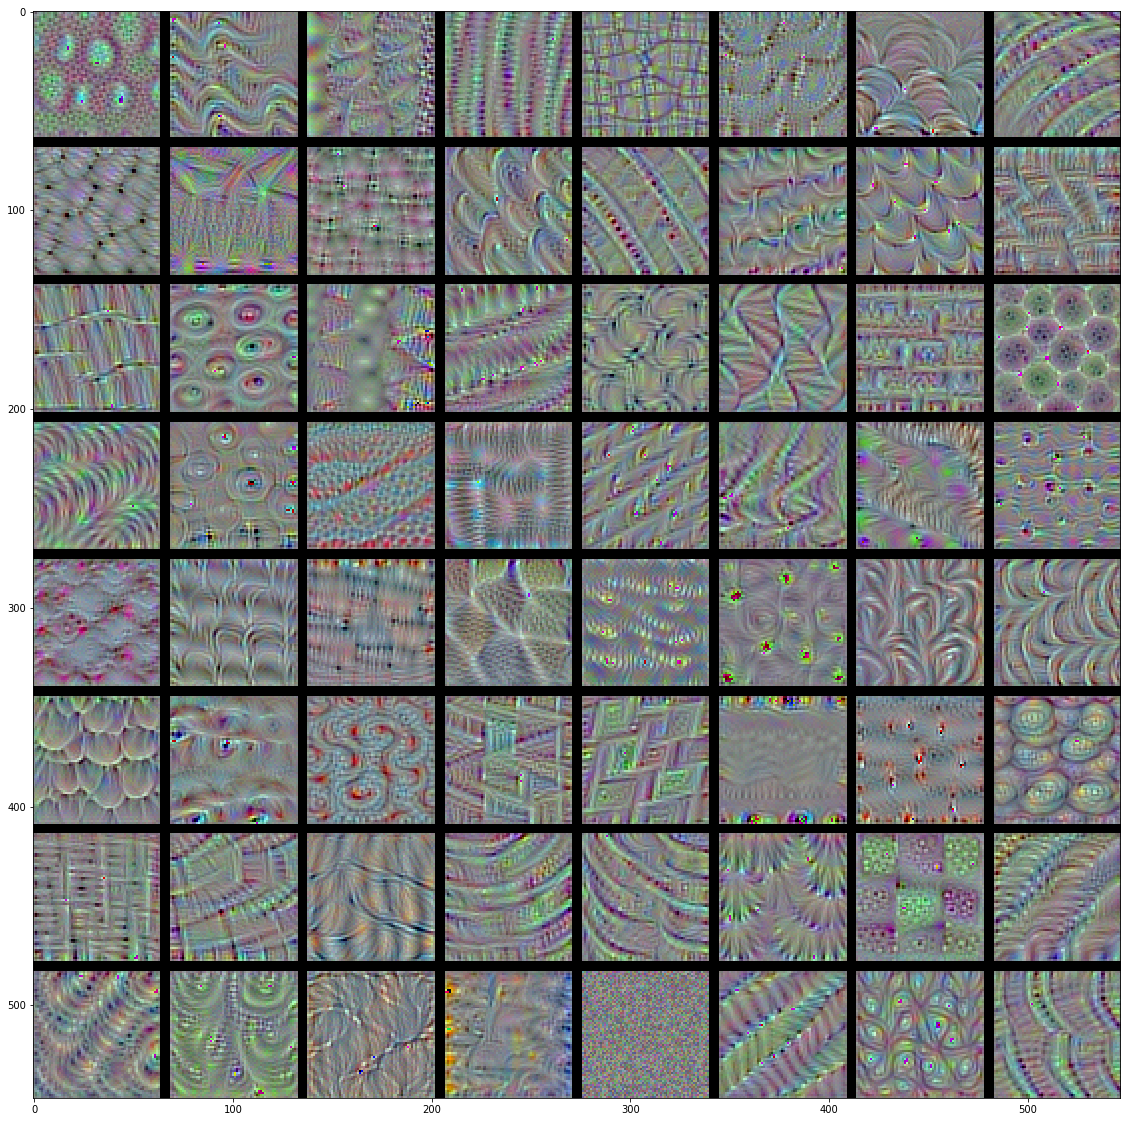

In [21]:
for layer_name in ['block1_conv1','block2_conv1','block3_conv1','block4_conv1',]:
    size=64
    margin=5
    
    results=np.zeros((8*size+7*margin,8*size+7*margin,3))
    
    for i in range(8):
        for j in range(8):
            filter_img=generate_pattern(layer_name,i*8+j,size=size)
            
            horizontal_start=i*size+i*margin
            horizontal_end=horizontal_start+size
            vertical_start=j*size+j*margin
            vertical_end=vertical_start+size
            
            results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img
            
    plt.figure(figsize=(20,20))
    plt.imshow(results)